In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mlt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Importing the dataset
data= pd.read_csv("titanic_train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
 # No. of Rows and Columns
data.shape

(891, 12)

In [5]:
# Info about the Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# No. of missing values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

---------HANDLING THE MISSING DATA---------

In [7]:
# Drop the cabin column from the df
data =data.drop(columns='Cabin',axis=1)

In [8]:
# Replacing the missing values in Age column with mean
data["Age"].fillna(data["Age"].mean(),inplace= True)

In [9]:
# Replacing the missing values iN Embarked column with 
data["Embarked"].mode()

0    S
Name: Embarked, dtype: object

In [10]:
data["Embarked"].fillna(data["Embarked"].mode()[0],inplace= True)

In [11]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

---------DATA ANALYSIS---------

In [12]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
# TO know the count of people survived
data["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

---------DATA VISUALISATION---------

In [14]:
sns.set()

<Axes: xlabel='Sex', ylabel='count'>

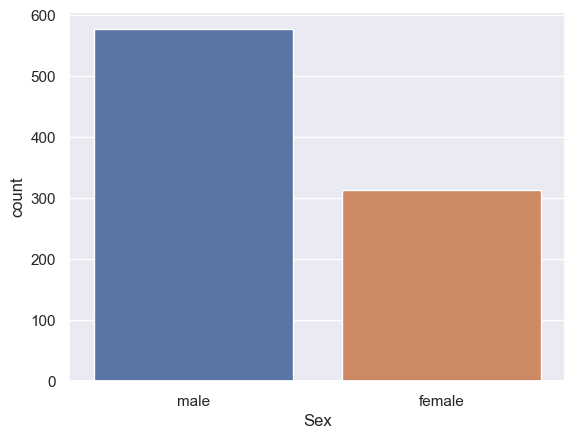

In [15]:
#Count plot on the basis of "Gender"
sns.countplot(data= data,x="Sex")

<Axes: xlabel='Survived', ylabel='count'>

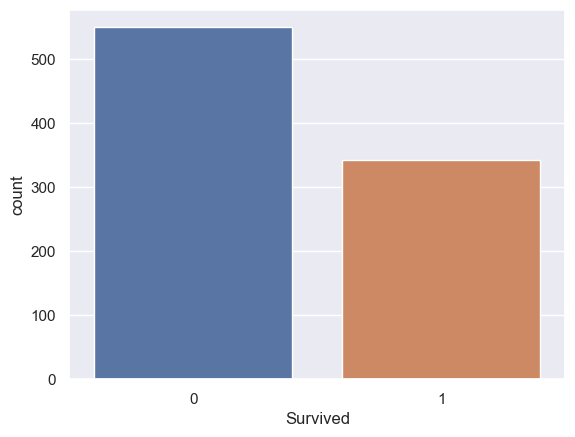

In [16]:
#Count plot on the basis of "Survived"
sns.countplot(data= data,x="Survived")

<Axes: xlabel='Survived', ylabel='count'>

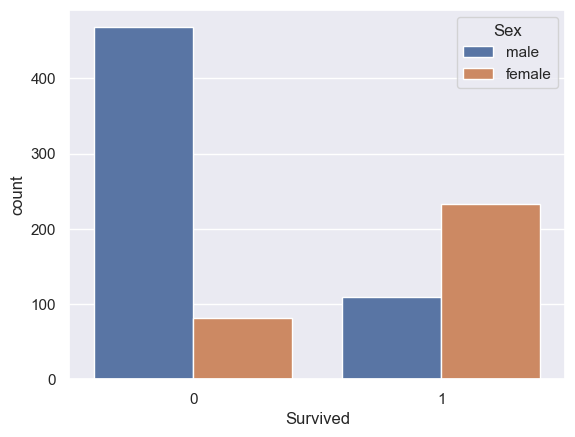

In [17]:
#Count plot on the basis of "Survived" and  "Gender"
sns.countplot(data= data,x="Survived",hue="Sex")

---------ENCODING---------

In [18]:
# to know the value counts as per Gender
data["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [19]:
# to know the value counts as per Enbarked
data["Embarked"].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [20]:
# Encoding the categotical columns
data.replace({"Sex":{"male":0,"female":1},"Embarked":{"S":0,"C":1,"Q":2}},inplace= True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


---------SEPERATING FEATURES AND TARGETS---------

In [21]:
x= data.drop(["PassengerId","Name","Survived","Ticket"],axis= 1)
y= data["Survived"]

In [22]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.000000,1,0,7.2500,0
1,1,1,38.000000,1,0,71.2833,1
2,3,1,26.000000,0,0,7.9250,0
3,1,1,35.000000,1,0,53.1000,0
4,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,0
887,1,1,19.000000,0,0,30.0000,0
888,3,1,29.699118,1,2,23.4500,0
889,1,0,26.000000,0,0,30.0000,1


In [23]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

---------Splitting the data into test data & train data---------

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

---------MODEL TRAINING---------

In [25]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

---------ACCURACY SCORE---------

In [26]:

#Accuracy on the training data
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(y_train,x_train_prediction)
print("Accuracy on the training data is:",training_data_accuracy)

Accuracy on the training data is: 0.8089887640449438


In [27]:
#Accuracy on the test data
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(y_test,x_test_prediction)
print("Accuracy on the training data is:",test_data_accuracy)

Accuracy on the training data is: 0.7932960893854749


---------BUILDING A PREDICTIVE SYSTEM ON GIVING INPUT---------

In [28]:
input_data= (1,0,46,0,1,7.28,1)
#change the input array into numpy array
input_as_numpy =np.asarray(input_data)

In [29]:
#reshape the numpy array as we are predicting for only one instance
input_reshaped =input_as_numpy.reshape(1,-1)
prediction =model.predict(input_reshaped)

In [30]:
print(prediction)
if (prediction[0]==0):
    print("THE PERSON WON'T BE SAVED FROM SINKING.")
else:
    print("THE PERSON WILL BE SAVED FROM SINKING.")

[0]
THE PERSON WON'T BE SAVED FROM SINKING.
